In [1]:
import gc, argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from beakerx import *
plt.style.use('ggplot')
import seaborn as sns
sns.set()
import h5py
import os
from tqdm import tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML, Image
from ipywidgets import interact,Dropdown,IntSlider,FloatRangeSlider, FloatSlider, RadioButtons
rc('animation', html='html5')
import plotly
import plotly.offline as off
import plotly.plotly as py
import plotly.graph_objs as go

In [3]:
cd /home/xupeng/projects/membrane/

/home/xupeng/projects/membrane


In [4]:
ls data/bigMask.vsseg_export_s0824.png

data/bigMask.vsseg_export_s0824.png


In [5]:
from PIL import Image
im = Image.open("data/bigMask.vsseg_export_s0824.png")

In [6]:
emdata = {}
for i in tqdm(range(1)):
    emdata[i] = scipy.misc.imread('data/bigMask.vsseg_export_s0824.png')

100%|██████████| 1/1 [00:00<00:00,  1.79it/s]


In [7]:
emdata[0].shape

(6165, 10770, 3)

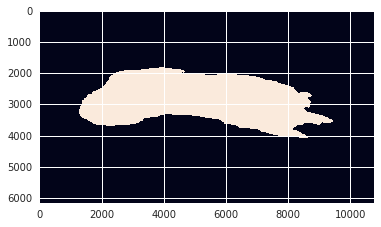

In [8]:
imshow(emdata[0][:,:,0])

In [9]:
np.unique(emdata[0][:,:,0],return_counts=True)

(array([0, 1], dtype=uint8), array([55260451, 11136599]))

In [10]:
# load image and shrink - it's massive
import cv2
img = cv2.resize(emdata[0][:,:,0], None,fx=0.25, fy=0.25, interpolation = cv2.INTER_CUBIC)

In [11]:
img.shape

(1541, 2692)

In [12]:
# get a blank canvas for drawing contour on and convert img to grayscale
img = emdata[0]
canvas = np.zeros(img.shape, np.uint8)
img2gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# filter out small lines between counties
kernel = np.ones((5,5),np.float32)/25
img2gray = cv2.filter2D(img2gray,-1,kernel)

# threshold the image and extract contours
ret,thresh = cv2.threshold(img2gray,250,255,cv2.THRESH_BINARY_INV)
im2,contours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [13]:
cnt = contours[0]
max_area = cv2.contourArea(cnt)

for cont in contours:
    if cv2.contourArea(cont) > max_area:
        cnt = cont
        max_area = cv2.contourArea(cont)

# define main island contour approx. and hull
perimeter = cv2.arcLength(cnt,True)
epsilon = 0.01*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

hull = cv2.convexHull(cnt)

# cv2.isContourConvex(cnt)

cv2.drawContours(canvas, cnt, -1, (0, 255, 0), 3)
cv2.drawContours(canvas, [approx], -1, (0, 0, 255), 3)

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]

In [14]:
canvas.shape

(6165, 10770, 3)

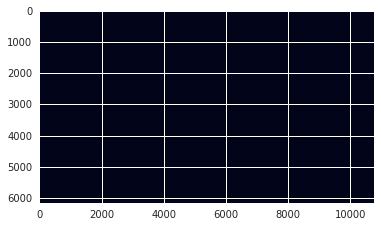

In [15]:
imshow(canvas[:,:,0])

In [16]:
np.unique(canvas[:,:,0],return_counts=True)

(array([0], dtype=uint8), array([66397050]))

In [37]:
emdata[0][:,:,0:1].shape

(6165, 10770, 1)

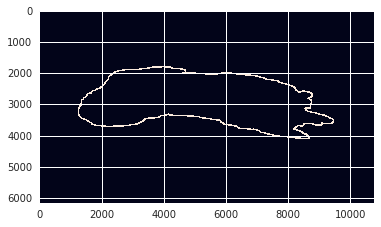

In [80]:
open0 = cv2.erode(emdata[0][:,:,0:1], None, iterations = 3)
open1 = cv2.dilate(open0, None, iterations = 40)
c = open1 - open0
imshow(c)

In [61]:
np.unique(c)

array([0, 1], dtype=uint8)

In [62]:
np.where(c==1)[0].shape[0]

485631

In [63]:
from skimage.measure import find_contours, approximate_polygon, \
    subdivide_polygon

In [77]:
for contour in find_contours(emdata[0][:,:,0], 0):
    coords = approximate_polygon(contour, tolerance=2.5)

In [86]:
cc = np.concatenate((np.where(c!=0)[0].reshape(-1,1),np.where(c!=0)[1].reshape(-1,1)),axis=1)

In [87]:
coords = approximate_polygon(cc, tolerance=2.5)

In [91]:
coords.shape

(4420, 2)

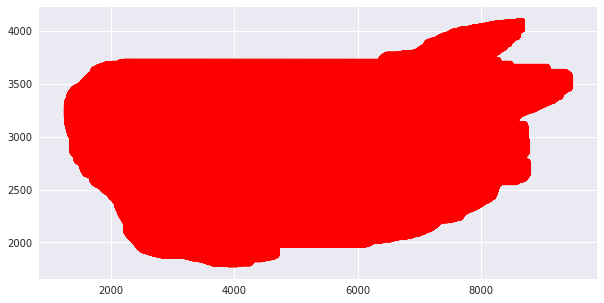

In [97]:
fig,ax=plt.subplots(1,figsize=(10,5))
plot(coords[:, 1], coords[:, 0], '-r', linewidth=2)

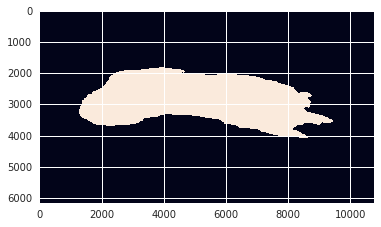

In [79]:
imshow(emdata[0][:,:,0])

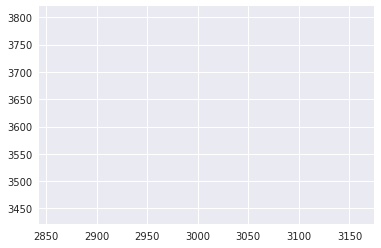

In [70]:
plot(coords[:, 1], coords[:, 0], '-r', linewidth=2)